In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached markdown_it_py-3.0.0-py3

In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# Build the feedforward neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

/Users/rakeshreddy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.8606 - loss: 0.4736 - val_accuracy: 0.9604 - val_loss: 0.1395
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9558 - loss: 0.1508 - val_accuracy: 0.9686 - val_loss: 0.1036
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.9657 - loss: 0.1101 - val_accuracy: 0.9724 - val_loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9733 - loss: 0.0872 - val_accuracy: 0.9766 - val_loss: 0.0762
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9759 - loss: 0.0754 - val_accuracy: 0.9782 - val_loss: 0.0697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9801 - loss: 0.0637 - val_accuracy: 0.9800 - val_loss: 0.0676
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9820 - loss: 0.0558 - val_accuracy: 0.9796 - val_loss: 0.0693
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.9832 -

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - 448us/step - accuracy: 0.9805 - loss: 0.0673

Test accuracy: 0.9804999828338623


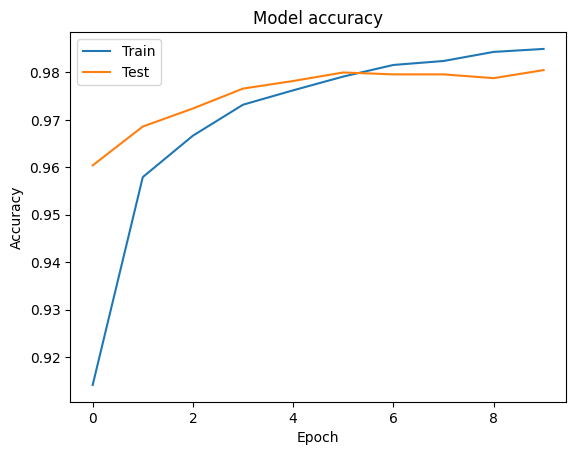

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

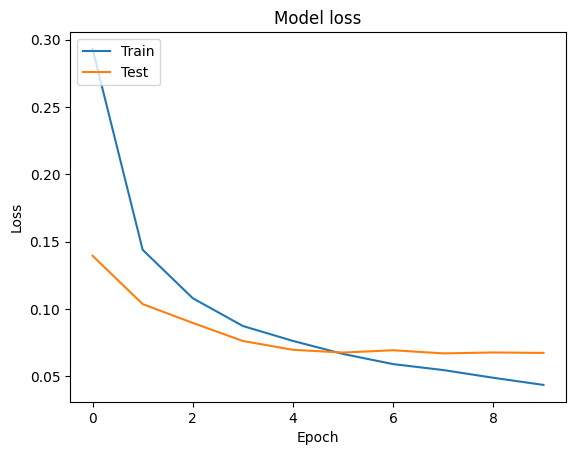

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
# Save the model
model.save('mnist_model.h5')



In [13]:
# Save the training logs
import json
with open('training_logs.json', 'w') as f:
    json.dump(history.history, f)

In [14]:
# Create an evaluation report
with open('evaluation_report.txt', 'w') as f:
    f.write(f'Test accuracy: {test_acc}\n')
    f.write(f'Test loss: {test_loss}\n')